# Convolutional Neural Network (CNN)

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
(train_data, train_labels),(test_data, test_label)= cifar10.load_data()

In [4]:
print(test_data.shape)

(10000, 32, 32, 3)


# Normalize

In [5]:
train_data= train_data.astype("float32")/255.0

In [6]:
test_data= test_data.astype("float32")/255.0

# Define Model

In [7]:
inputs= keras.Input(shape=(32,32,3))

In [8]:
x= keras.layers.Conv2D(16,(3,3), activation="relu")(inputs)
x= keras.layers.MaxPooling2D((2,2))(x)
x= keras.layers.Conv2D(32,(3,3), activation="relu")(x)
x= keras.layers.MaxPooling2D((2,2))(x)
x=keras.layers.Flatten()(x)
x=keras.layers.Dense(64,activation="relu", name="Dense1")(x)
outputs= keras.layers.Dense(10,activation="softmax")(x)

2022-10-18 13:24:39.788722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model=keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0     

In [11]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'] )

In [12]:
model.fit(train_data,train_labels, batch_size=32, epochs=5, verbose=2)
model.evaluate(test_data, batch_size=32, verbose=2)

Epoch 1/5
1563/1563 - 16s - loss: 2.0056 - accuracy: 0.2771 - 16s/epoch - 10ms/step
Epoch 2/5
1563/1563 - 16s - loss: 1.6401 - accuracy: 0.4123 - 16s/epoch - 10ms/step
Epoch 3/5
1563/1563 - 20s - loss: 1.4922 - accuracy: 0.4653 - 20s/epoch - 13ms/step
Epoch 4/5
1563/1563 - 17s - loss: 1.4074 - accuracy: 0.4960 - 17s/epoch - 11ms/step
Epoch 5/5
1563/1563 - 16s - loss: 1.3449 - accuracy: 0.5213 - 16s/epoch - 10ms/step
313/313 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - 349ms/epoch - 1ms/step


[0.0, 0.0]

In [14]:
#Plot accuracy and losss curves
import matplotlib.pyplot as plt


In [15]:
y_loss = {}  # loss history
y_loss['train'] = []
y_loss['val'] = []
y_err = {}
y_err['train'] = []
y_err['val'] = []
x_epoch = []

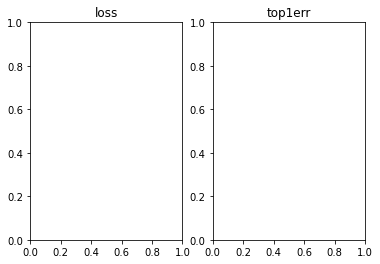

In [16]:
fig = plt.figure()
ax0 = fig.add_subplot(121, title="loss")
ax1 = fig.add_subplot(122, title="top1err")

In [17]:
def draw_curve(current_epoch):
    x_epoch.append(current_epoch)
    ax0.plot(x_epoch, y_loss['train'], 'bo-', label='train')
    ax0.plot(x_epoch, y_loss['val'], 'ro-', label='val')
    ax1.plot(x_epoch, y_err['train'], 'bo-', label='train')
    ax1.plot(x_epoch, y_err['val'], 'ro-', label='val')
    if current_epoch == 0:
        ax0.legend()
        ax1.legend()
    fig.savefig(os.path.join('./lossGraphs', 'train.jpg'))

In [18]:
running_loss = 0.0
running_corrects = 0.0

In [19]:
running_loss += loss.item() * now_batch_size

NameError: name 'loss' is not defined

In [20]:
epoch_loss = running_loss / dataset_sizes[phase]
epoch_acc = running_corrects / dataset_sizes[phase]


NameError: name 'dataset_sizes' is not defined